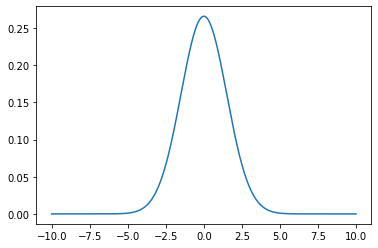

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import uniform
import warnings
warnings.filterwarnings('ignore')

x = np.linspace(-10, 10, 1000)
y = stats.norm.pdf(x, loc = 0, scale = 1.5)

plt.plot(x, y)
plt.show()

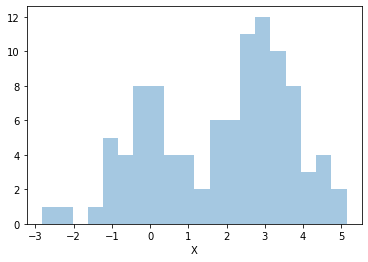

In [2]:
df = pd.read_csv('/home/hamza/Downloads/DataSets/bimodal_example.csv')

data = df['X']
sns.distplot(data, bins = 20, kde = False)
plt.show()

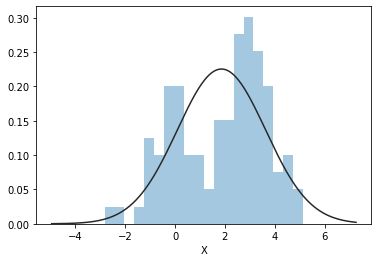

In [3]:
sns.distplot(data, fit = stats.norm ,bins = 20, kde = False)
plt.show()

In [4]:
def pdf(mu, sigma, x):
    return ((1/(sigma * np.sqrt(2 * np.pi))))*(np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2))))

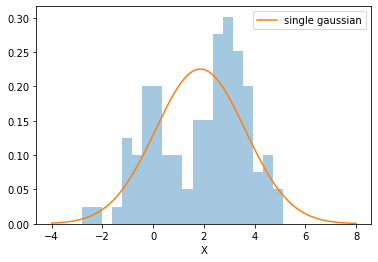

In [5]:
x = np.linspace(-4, 8, 200)
g_single = stats.norm(np.mean(data), np.std(data)).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist = True)
plt.plot(x, g_single, label='single gaussian')
plt.legend()

In [6]:
class Gaussian_Mixture:
    
    def __init__(self, data, min_mu = np.min(data), max_mu = np.max(data), min_sigma = 0.1, max_sigma = 1, w = 0.5):
        
        self.data = data

        # pick random value for mu and sigma for each cluster.
        self.one_mu = uniform(min_mu, max_mu)
        self.one_sigma =  uniform(min_sigma, max_sigma)
        self.two_mu = uniform(min_mu, max_mu)
        self.two_sigma =  uniform(min_sigma, max_sigma)
        self.w = w
        self.loglike = 0
    
    def Estep(self):
        self.loglike = 0
        wp1_list, wp2_list = [], []
        for x in self.data:
            wp1 = pdf(self.one_mu, self.one_sigma, x) * self.w
            wp2 = pdf(self.two_mu, self.two_sigma, x) * (1 - self.w)
            
            total = wp1 + wp2
            
            wp1 /= total
            wp2 /= total
            
            self.loglike += np.log(wp1 + wp2)
            
            wp1_list.append(wp1)
            wp2_list.append(wp2)
            
        return wp1_list, wp2_list
    
    def Mstep(self, left, right):
        
        # Updata mu and sigma values.
        self.one_mu = np.sum((l * d) / np.sum(left) for (l, d) in zip(left, self.data))
        self.two_mu = np.sum((r * d) / np.sum(right) for (r, d) in zip(right, self.data))
        
        self.one_sigma = np.sqrt(np.sum(l * ((d - self.one_mu) ** 2) for (l, d) in zip(left, self.data)) / np.sum(left))
        self.two_sigma = np.sqrt(np.sum(r * ((d - self.two_mu) ** 2) for (r, d) in zip(right, self.data)) / np.sum(right))
        
        
        self.w = np.sum(left) / len(data)

    def pdf(self, x):
        return (self.w) * pdf(self.one_mu, self.one_sigma, x) + (1 - self.w) * pdf(self.two_mu, self.two_sigma, x)

Computing best model with random restarts...



Done. 🙂


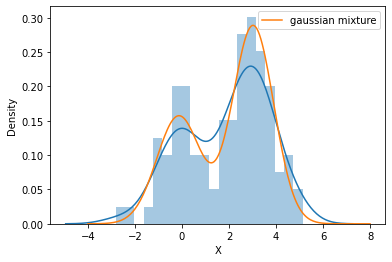

In [12]:
n_iters = 50
n_random_start = 100
best_mix = None
best_loglike = float('-inf')

print('Computing best model with random restarts...\n')
for _ in range(n_random_start):
    mix = Gaussian_Mixture(data)
    for _ in range(n_iters):
        try:
            left, right = mix.Estep()
            mix.Mstep(left, right)
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, RuntimeError, ValueError):
                pass
print('\n\nDone. 🙂')

sns.distplot(data, bins=20, kde = True, norm_hist = True)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label = 'gaussian mixture')
plt.legend()

#################################################################################################################

<AxesSubplot:>

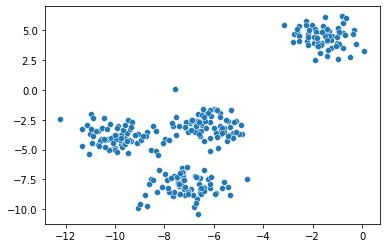

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.mixture import GaussianMixture

X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = .80, random_state = 1)

sns.scatterplot(X[:,0],X[:,1])

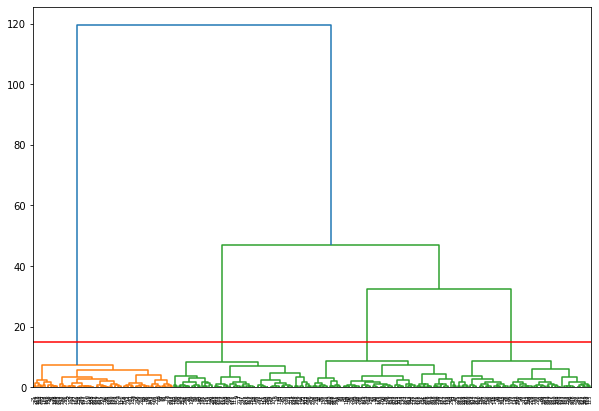

In [9]:
plt.figure(figsize=(10, 7))
clusters = shc.linkage(X, method = 'ward', metric = 'euclidean')
shc.dendrogram(clusters)
plt.axhline(y = 15, color = 'r', linestyle = '-')
plt.show()

<AxesSubplot:>

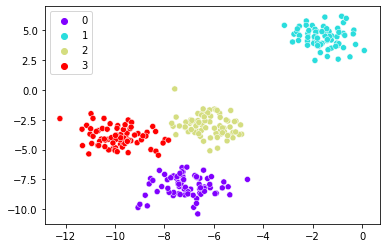

In [10]:
GM = GaussianMixture(n_components = 4).fit(X)
labels = GM.predict(X)

sns.scatterplot(X[:,0],X[:,1], hue = labels, palette = 'rainbow')

#################################################################################################################

/home/hamza/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

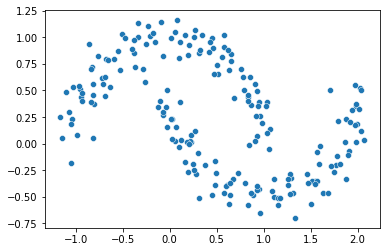

In [10]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples = 200, noise = .1 ,random_state = 0, )

sns.scatterplot(X[:,0], X[:,1])

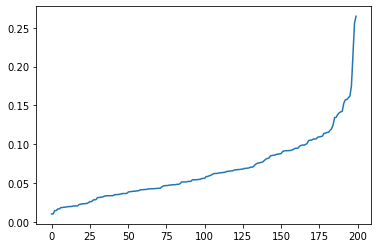

In [12]:
nn = NearestNeighbors(n_neighbors = 2)
nbors = nn.fit(X)
distances, indeces = nbors.kneighbors(X)

distances = np.sort(distances, axis = 0)[:,1]
plt.plot(distances)

/home/hamza/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

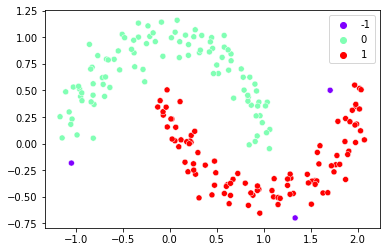

In [20]:
dbscan = DBSCAN(eps = 0.18, min_samples = 4)
dbscan.fit(X)

labels = dbscan.labels_

sns.scatterplot(X[:,0], X[:,1], hue = labels, palette = 'rainbow')